In [1]:
import pandas as pd

data = pd.read_csv('../../../../../../downloads/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Text(0.5, 1.0, 'Survived Ratio')

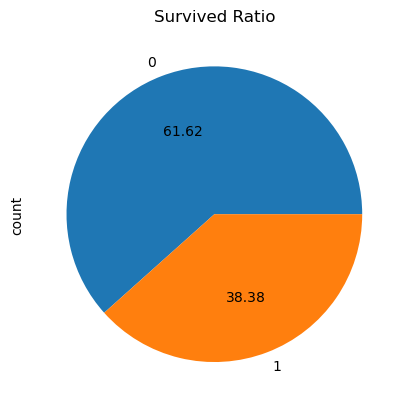

In [4]:
ax = data['Survived'].value_counts().plot.pie(autopct = '%.2f')
ax.set_title('Survived Ratio')

<function matplotlib.pyplot.show(close=None, block=None)>

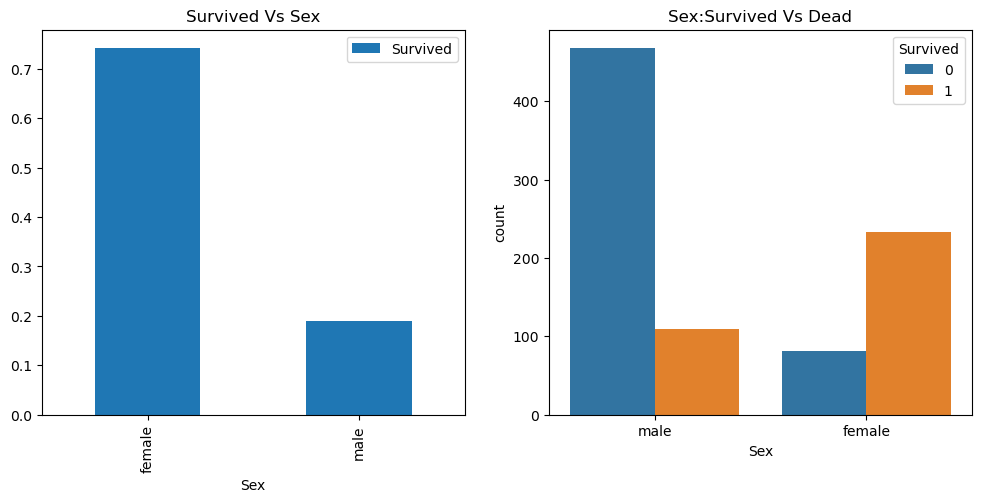

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1, 2, figsize = (12, 5))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived Vs Sex')
sns.countplot(x='Sex', hue = 'Survived', data=data, ax=ax[1])

ax[1].set_title('Sex:Survived Vs Dead')
plt.show

In [6]:
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [7]:
pd.crosstab(data.Pclass, data.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


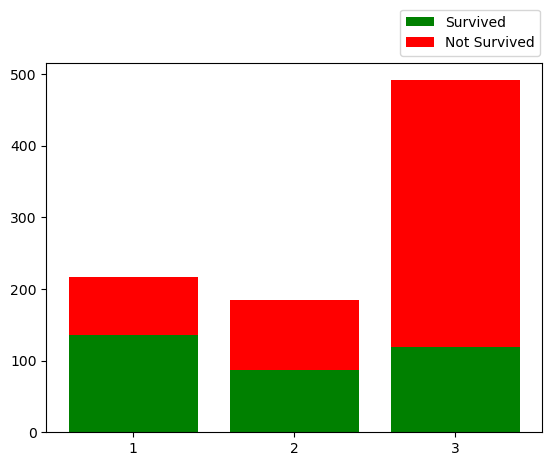

In [8]:
import numpy as np
import matplotlib.pyplot as plt

survived = [136, 87, 119]
not_survived = [80, 97, 372]

Pclass = ['1', '2', '3']

plt.bar(Pclass, survived, color = 'green', label = 'Survived')
plt.bar(Pclass, not_survived, color = 'red', bottom = np.array(survived), label = 'Not Survived')

plt.legend(loc = 'lower left', bbox_to_anchor = (0.7, 1.0))
plt.show()

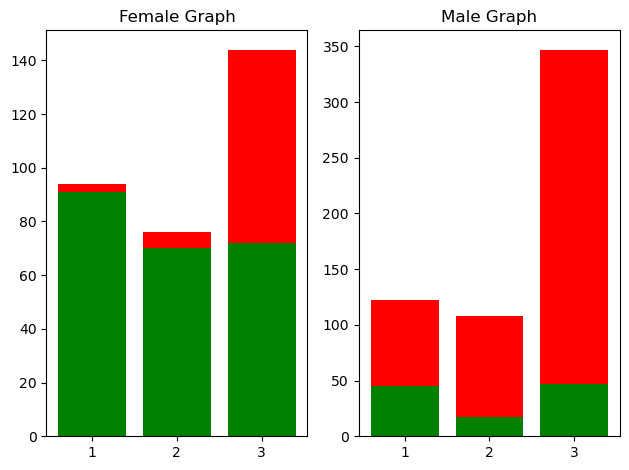

In [9]:
Pclass = ['1', '2', '3']
f_survived = [91, 70, 72]
f_not_survived = [3, 6, 72]

m_survived = [45, 17, 47]
m_not_survived = [77, 91, 300]

plt.subplot(1, 2, 1)
plt.bar(Pclass, f_survived, color = 'green', label = 'Survived')
plt.bar(Pclass, f_not_survived, color = 'red', bottom = np.array(f_survived), label = 'Not Survived')
plt.title("Female Graph")

plt.subplot(1, 2, 2)
plt.bar(Pclass, m_survived, color = 'green', label = 'Survived')
plt.bar(Pclass, m_not_survived, color = 'red', bottom = np.array(m_survived), label = 'Not Survived')
plt.title("Male Graph")

plt.tight_layout()
plt.show()

In [10]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
data.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000
